$f(x,y) = - \left(\dfrac{3}{(x^2+ 8)} + \dfrac{5}{(y^2+ 8)}\right)$

Adaptive Gradient. AdaGrad. Едленко 4к. 6г.

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib import cm
import time
from keras.utils import to_categorical
from keras import models
from keras import layers

In [2]:
def my_func(x,y):
    return -((3 / (x*x + 8)) + (5 / (y*y + 8)))

In [3]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
    
def sigmoid_diff(y):
    return y*(1 - y)

In [4]:
def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

In [5]:
class NeuralNetwork:
    def __init__(self, x, y):
      # Входные данные

        self.input      = np.array([x[0].ravel(), x[1].ravel()])
        self.y          = np.array(y).ravel()
        self.diam_s     = 5
        self.alpha      = 0.001

        self.weights1   = np.random.rand(self.diam_s, self.input.shape[0])
        self.weights2   = np.random.rand(1, self.diam_s)
        self.bias       = np.random.rand(self.diam_s, 1)
        self.b          = np.random.rand()
        
        self.output     = np.zeros(self.y.shape)
        self.alpha      = 1
        self.bias       = np.random.rand(self.diam_s, 1)
        self.b          = np.random.rand()

      #Расчет для AdaGrad

        self.G_d_weights2    = np.zeros(self.weights2.shape)
        self.G_d_weights1    = np.zeros(self.weights1.shape)
        self.G_d_bias        = np.zeros(self.bias.shape)
        self.G_d_b           = 0
        self.eps             = 0.000000001
        
    #Ф-ия прямого распространения
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.weights1, self.input) + self.bias)
        self.output = np.dot(self.weights2, self.layer1) + self.b
    
    #Ф-ия обратного распространения
    def backprop(self):
        d_weights2 = 2*np.dot((self.y - self.output),self.layer1.T)
        d_weights1 = 2*self.weights2.T*np.dot((self.y - self.output)*sigmoid_diff(self.layer1),self.input.T)
        d_bias     = 2*self.weights2.T*np.dot(sigmoid_diff(self.layer1), (self.y - self.output).T)
        d_b        = 2*(self.y - self.output).sum()

        self.G_d_weights2    += d_weights2**2
        self.G_d_weights1    += d_weights1**2
        self.G_d_bias        += d_bias**2
        self.G_d_b           += d_b**2

        self.weights1 += self.alpha * d_weights1/np.sqrt(self.G_d_weights1 + self.eps)
        self.weights2 += self.alpha * d_weights2/np.sqrt(self.G_d_weights2 + self.eps)
        self.bias     += self.alpha * d_bias/np.sqrt(self.G_d_bias + self.eps)
        self.b        += self.alpha * d_b/np.sqrt(self.G_d_b + self.eps)

  #Ф-ия расчета значений
    def result(self, t):
        return np.dot(self.weights2, sigmoid(np.dot(self.weights1, t) + self.bias)) + self.b

In [6]:
X = np.arange(-20, 20, 1)
Y = np.arange(-20, 20, 1)
X, Y = np.meshgrid(X, Y)
X1, Y1 = X.ravel(), Y.ravel()
Z1 = my_func(X1, Y1)
Xd = np.array([X1,Y1])
Xd.shape
Zd = np.array([list(Z1)])
Zd.shape


In [ ]:
z = NeuralNetwork(Xd,Zd)
z.alpha = 0.001
z.diam_s = 5

In [12]:
count = 0
while(count < 99999):
    z.feedforward()
    z.backprop()
    count += 1
    if(count % 50 == 0):
      print(mse_loss(Zd, z.result(Xd)))
    if(mse_loss(Zd, z.result(Xd)) < 0.001):
      break

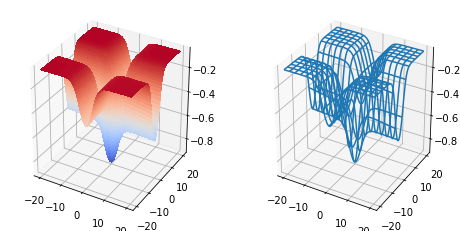

In [8]:
fig_2 = plt.figure(figsize=plt.figaspect(0.5))

ax_2 = fig_2.add_subplot(1, 2, 1, projection='3d')
X = np.arange(-20, 20.25, 0.25)
Y = np.arange(-20, 20.25, 0.25)
X, Y = np.meshgrid(X, Y)

Z = z.result(np.array([X.ravel(),Y.ravel()])).reshape((161,161))

ax_2.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax_2 = fig_2.add_subplot(1, 2, 2, projection='3d')

ax_2.plot_wireframe(X, Y, Z, rstride=10, cstride=10)